In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots


# Definindo estilo dos gráficos

plt.rcParams['font.size'] = 15
plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False

# Criando o conjunto de dados

a = coeficiente angular  
b = intercepto  
r = intensidade do ruído  
y = dados lineares  

In [2]:
def Y(x, a, b, r):
    """ Target."""
    linear = a*x + b
    ruido = r * np.random.rand(len(x))
    return linear + ruido

In [3]:
a = 2.0
b = 1.0
x = np.linspace(-1,1,26) # Feature

In [4]:
np.random.rand(len(x))

array([0.21706679, 0.78180532, 0.70749197, 0.51358023, 0.22682214,
       0.07586599, 0.68815787, 0.88420425, 0.17512252, 0.25655814,
       0.20048528, 0.58073897, 0.10827498, 0.8567471 , 0.14539833,
       0.74672028, 0.70354007, 0.59206016, 0.69671543, 0.78274316,
       0.64048747, 0.35689155, 0.75577453, 0.19189441, 0.25726619,
       0.08424818])

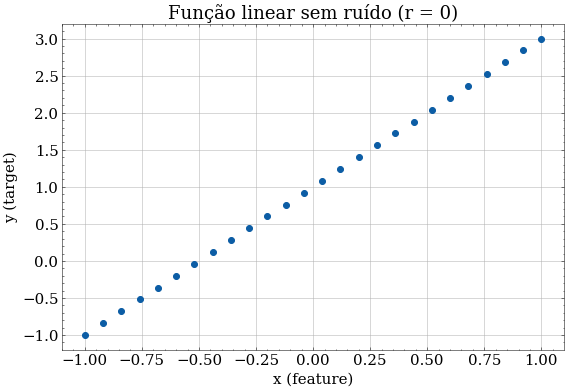

In [23]:
r = 0.0

plt.figure(figsize=(9,6))
plt.plot(x, Y(x, a, b, r), ls='', marker='o')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Função linear sem ruído (r = 0)')
plt.grid()
plt.show()

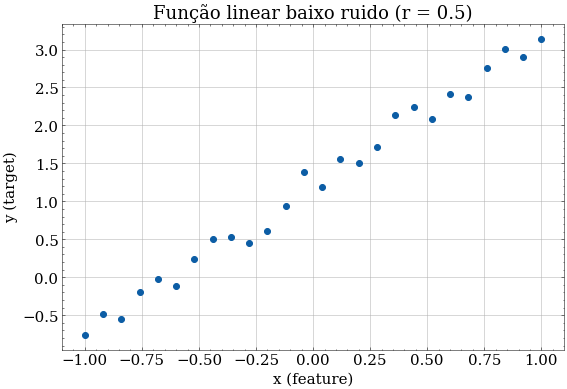

In [24]:
r = 0.5

plt.figure(figsize=(9,6))
plt.plot(x, Y(x, a, b, r), ls='', marker='o')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Função linear baixo ruido (r = 0.5)')
plt.grid()
plt.show()

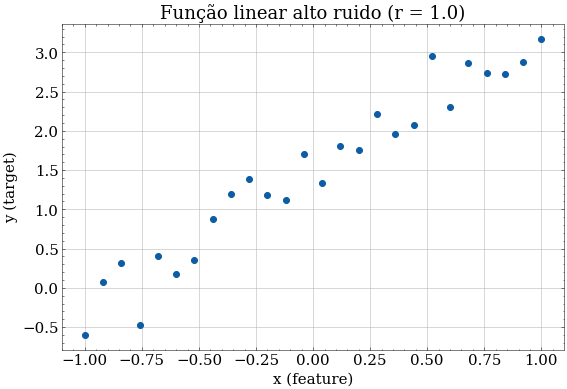

In [25]:
r = 1.0

plt.figure(figsize=(9,6))
plt.plot(x, Y(x, a, b, r), ls='', marker='o')
plt.xlabel('x (feature)')
plt.ylabel('y (target)')
plt.title('Função linear alto ruido (r = 1.0)')
plt.grid()
plt.show()

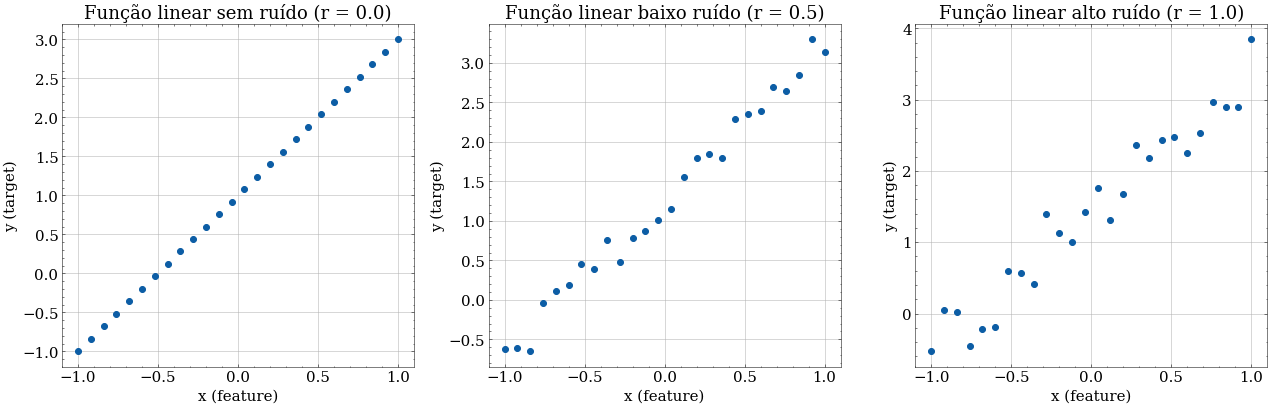

In [20]:
r_values = [0.0, 0.5, 1.0]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Primeiro gráfico: r = 0.0
axes[0].plot(x, Y(x, a, b, 0.0), ls='', marker='o')
axes[0].set_xlabel('x (feature)')
axes[0].set_ylabel('y (target)')
axes[0].set_title('Função linear sem ruído (r = 0.0)')
axes[0].grid()

# Segundo gráfico: r = 0.5
axes[1].plot(x, Y(x, a, b, 0.5), ls='', marker='o')
axes[1].set_xlabel('x (feature)')
axes[1].set_ylabel('y (target)')
axes[1].set_title('Função linear baixo ruído (r = 0.5)')
axes[1].grid()

# Terceiro gráfico: r = 1.0
axes[2].plot(x, Y(x, a, b, 1.0), ls='', marker='o')
axes[2].set_xlabel('x (feature)')
axes[2].set_ylabel('y (target)')
axes[2].set_title('Função linear alto ruído (r = 1.0)')
axes[2].grid()


plt.tight_layout()

plt.show()

# Treinando e calculando os erros

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

np.random.seed(42)

r_array = np.linspace(0, 10.0, 101) # Valores de r de 0 até 10

# Listas para armazenar as métricas para cada valor de r

rmse_list = []
mae_list = []
me_list= []

# Instancando o modelo

lr = LinearRegression()


for r in r_array:
    y = Y(x, a=2.0, b=1.0, r=r)
    
    # Treinamento
    
    lr.fit(x.reshape(-1, 1), y)
    
    # Previsão
    
    y_pred = lr.predict(x.reshape(-1,1))
    
    # Métricas
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y,y_pred)
    me = np.sum((y - y_pred)) / len(y)
    rmse_list.append(rmse)
    mae_list.append(mae)
    me_list.append(me)

# Comparando coeficientes da reta

In [10]:
# Valores atribuídos

a, b

(2.0, 1.0)

In [11]:
# Coeficientes angular e linear (r = 10, última iteração)

lr.coef_, lr.intercept_

(array([3.97897849]), 5.521450277821251)

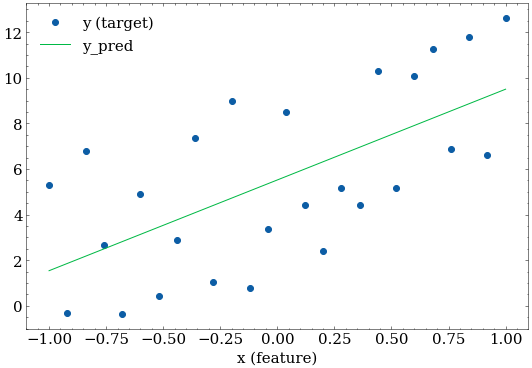

In [21]:
plt.figure(figsize=(9,6))

plt.plot(x, y, marker='o', ls='', label='y (target)')
plt.plot(x, y_pred, label='y_pred')
plt.xlabel('x (feature)')
plt.legend()
plt.show()

# Checando as métricas

In [13]:
# ME
np.sum((y - y_pred)) / len(y)

-3.75767792950053e-16

In [14]:
# MSE
np.sum((y - y_pred)**2) / len(y)

8.32334788861951

In [15]:
# RMSE
np.sqrt(np.sum((y - y_pred)**2) / len(y))

2.885021297775722

In [16]:
# MAE

np.sum(np.abs(y - y_pred)) / len(y)

2.690461002286985

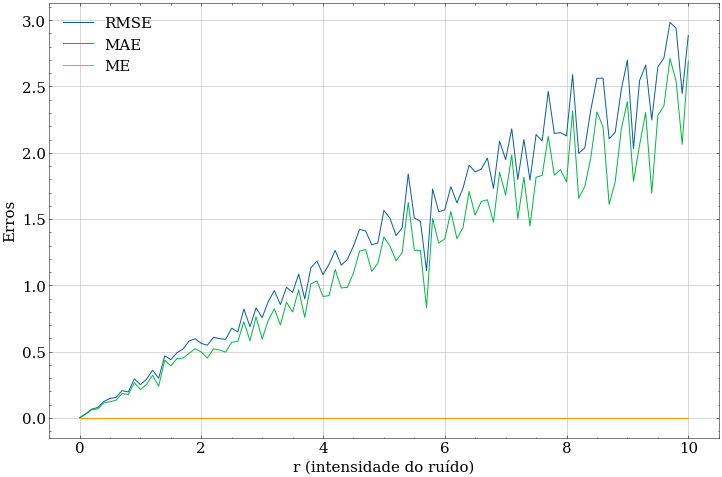

In [22]:
plt.figure(figsize=(12,8))

plt.plot(r_array, rmse_list, label='RMSE')
plt.plot(r_array, mae_list, label='MAE')
plt.plot(r_array, me_list, label='ME')
plt.xlabel('r (intensidade do ruído)')
plt.ylabel('Erros')
plt.grid()
plt.legend()
plt.show()